In [1]:
import pandas as pd
from datetime import timedelta

In [68]:
def clean(df):
    states = ['New York','New Jersey','Massachusetts','Virginia','Maryland','Pennsylvania','Connecticut','Delaware','Rhode Island','Washington','West Virginia']
    df = pd.DataFrame(df[df['Province_State'].isin(states)],columns=df.columns).reset_index()
    # clean the Last_Update column into date
    df['Last_Update'] = df['Last_Update'].apply(lambda x: pd.to_datetime(x).date()) - timedelta(days=1)
    return(df)

In [85]:
def myurl(date):
    u1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-'
    u2 = '-2020.csv'
    if date<10:
        return (u1+'0'+str(date)+u2)
    else:
        return(u1+str(date)+u2)

In [81]:
def auto_collect(start,end):
    out = clean(pd.read_csv(myurl(start)))
    date = start+1
    while date < end+1:
        print(date)
        df = clean(pd.read_csv(myurl(date)))
        # filter out targeted states
        out = pd.concat([out,df])
        date += 1
    return out

In [86]:
#sep = auto_collect(1,30)
oc = auto_collect(1,9)

2
3
4
5
6
7
8
9


In [84]:
sep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13230 entries, 0 to 440
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                13230 non-null  int64  
 1   FIPS                 13200 non-null  float64
 2   Admin2               13230 non-null  object 
 3   Province_State       13230 non-null  object 
 4   Country_Region       13230 non-null  object 
 5   Last_Update          13230 non-null  object 
 6   Lat                  12900 non-null  float64
 7   Long_                12900 non-null  float64
 8   Confirmed            13230 non-null  int64  
 9   Deaths               13230 non-null  int64  
 10  Recovered            13230 non-null  int64  
 11  Active               13230 non-null  float64
 12  Combined_Key         13230 non-null  object 
 13  Incidence_Rate       12900 non-null  float64
 14  Case-Fatality_Ratio  13080 non-null  float64
dtypes: float64(6), int64(4), object(5)
mem

In [87]:
oc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3969 entries, 0 to 440
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                3969 non-null   int64  
 1   FIPS                 3960 non-null   float64
 2   Admin2               3969 non-null   object 
 3   Province_State       3969 non-null   object 
 4   Country_Region       3969 non-null   object 
 5   Last_Update          3969 non-null   object 
 6   Lat                  3870 non-null   float64
 7   Long_                3870 non-null   float64
 8   Confirmed            3969 non-null   int64  
 9   Deaths               3969 non-null   int64  
 10  Recovered            3969 non-null   int64  
 11  Active               3969 non-null   float64
 12  Combined_Key         3969 non-null   object 
 13  Incidence_Rate       3870 non-null   float64
 14  Case-Fatality_Ratio  3924 non-null   float64
dtypes: float64(6), int64(4), object(5)
memo

In [101]:
# combine the files
cleaned = pd.concat([sep,oc]).set_index('index')

In [102]:
cleaned.reset_index()
cleaned

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
index,,,,,,,,,,,,,,
944,9001.0,Fairfield,Connecticut,US,2020-09-01,41.268099,-73.388117,18939,1415,0,17524.0,"Fairfield, Connecticut, US",2007.670682,7.471355
945,9003.0,Hartford,Connecticut,US,2020-09-01,41.802830,-72.731039,13529,1425,0,12104.0,"Hartford, Connecticut, US",1517.180281,10.532929
946,9005.0,Litchfield,Connecticut,US,2020-09-01,41.793753,-73.245148,1713,138,0,1575.0,"Litchfield, Connecticut, US",949.909334,8.056042
947,9007.0,Middlesex,Connecticut,US,2020-09-01,41.459497,-72.537149,1466,192,0,1274.0,"Middlesex, Connecticut, US",902.509296,13.096862
948,9009.0,New Haven,Connecticut,US,2020-09-01,41.408033,-72.936204,13711,1109,0,12602.0,"New Haven, Connecticut, US",1604.081628,8.088396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800,54101.0,Webster,West Virginia,US,2020-10-09,38.493709,-80.420202,9,0,0,9.0,"Webster, West Virginia, US",110.919399,0.000000
3801,54103.0,Wetzel,West Virginia,US,2020-10-09,39.606577,-80.640165,67,0,0,67.0,"Wetzel, West Virginia, US",444.739462,0.000000
3802,54105.0,Wirt,West Virginia,US,2020-10-09,39.027750,-81.374739,19,0,0,19.0,"Wirt, West Virginia, US",326.404398,0.000000


In [103]:
# when you're done, export to csv
cleaned.to_csv('covid_cleaned.csv',index=False,encoding='utf-8-sig')

<AxesSubplot:ylabel='index'>

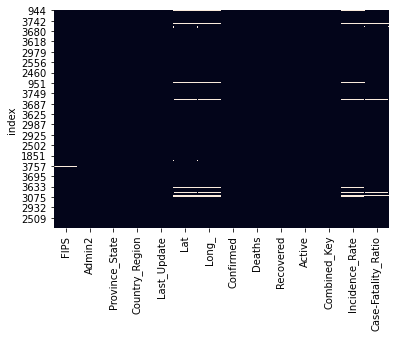

In [104]:
# Visualizing missing data
import seaborn as sns
sns.heatmap(cleaned.isnull(),cbar = False)
#indicating some of the latitude and longtitude are missing

## Combine the cleaned dataset

In [94]:
import pandas as pd

In [104]:
w1 = pd.read_csv('week1cleaned.csv')
w1.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,9001.0,Fairfield,Connecticut,US,2020-09-01,41.268099,-73.388117,18939,1415,0,17524.0,"Fairfield, Connecticut, US",2007.670682,7.471355
1,9003.0,Hartford,Connecticut,US,2020-09-01,41.802830,-72.731039,13529,1425,0,12104.0,"Hartford, Connecticut, US",1517.180281,10.532929
2,9005.0,Litchfield,Connecticut,US,2020-09-01,41.793753,-73.245148,1713,138,0,1575.0,"Litchfield, Connecticut, US",949.909334,8.056042
3,9007.0,Middlesex,Connecticut,US,2020-09-01,41.459497,-72.537149,1466,192,0,1274.0,"Middlesex, Connecticut, US",902.509296,13.096862
4,9009.0,New Haven,Connecticut,US,2020-09-01,41.408032,-72.936204,13711,1109,0,12602.0,"New Haven, Connecticut, US",1604.081628,8.088396


In [132]:
w2 = pd.read_csv('week2cleaned.csv')
w2.columns = w1.columns
w2.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,9001.0,Fairfield,Connecticut,US,2020-09-09,41.268099,-73.388117,19135,1417,0,17718,"Fairfield, Connecticut, US",2028.448097,7.405278
1,9003.0,Hartford,Connecticut,US,2020-09-09,41.802830,-72.731039,13771,1428,0,12343,"Hartford, Connecticut, US",1544.318844,10.369617
2,9005.0,Litchfield,Connecticut,US,2020-09-09,41.793753,-73.245148,1751,139,0,1612,"Litchfield, Connecticut, US",970.981462,7.938321
3,9007.0,Middlesex,Connecticut,US,2020-09-09,41.459497,-72.537149,1496,193,0,1303,"Middlesex, Connecticut, US",920.978108,12.901070
4,9009.0,New Haven,Connecticut,US,2020-09-09,41.408033,-72.936204,13858,1109,0,12749,"New Haven, Connecticut, US",1621.279498,8.002598


In [137]:
w3 = pd.read_csv('week3cleaned.csv')
w3.drop(['index'],axis=1,inplace = True)
w3.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,9001.0,Fairfield,Connecticut,US,2020-09-15,41.268099,-73.388117,19558,1419,0,18139.0,"Fairfield, Connecticut, US",2073.289150,7.255343
1,9003.0,Hartford,Connecticut,US,2020-09-15,41.802830,-72.731039,14099,1431,0,12668.0,"Hartford, Connecticut, US",1581.101691,10.149656
2,9005.0,Litchfield,Connecticut,US,2020-09-15,41.793753,-73.245148,1798,140,0,1658.0,"Litchfield, Connecticut, US",997.044357,7.786429
3,9007.0,Middlesex,Connecticut,US,2020-09-15,41.459497,-72.537149,1527,193,0,1334.0,"Middlesex, Connecticut, US",940.062548,12.639162
4,9009.0,New Haven,Connecticut,US,2020-09-15,41.408032,-72.936204,14082,1111,0,12971.0,"New Haven, Connecticut, US",1647.485777,7.889504


In [117]:
w4 = pd.read_csv('week4cleaned.csv')
w4.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
2802,54101.0,Webster,West Virginia,US,2020-09-28,38.493709,-80.420202,8,0,0,8,"Webster, West Virginia, US",98.595021,0.000000
2803,54103.0,Wetzel,West Virginia,US,2020-09-28,39.606577,-80.640165,55,0,0,55,"Wetzel, West Virginia, US",365.084633,0.000000
2804,54105.0,Wirt,West Virginia,US,2020-09-28,39.027750,-81.374739,12,0,0,12,"Wirt, West Virginia, US",206.150146,0.000000
2805,54107.0,Wood,West Virginia,US,2020-09-28,39.209679,-81.516284,366,6,0,360,"Wood, West Virginia, US",438.228885,1.639344
2806,54109.0,Wyoming,West Virginia,US,2020-09-28,37.612327,-81.545111,118,3,0,115,"Wyoming, West Virginia, US",578.601549,2.542373


In [122]:
w5 = pd.read_csv('week5cleaned.csv')
w5.drop(['index'],axis=1,inplace = True)
w5.shape

(2406, 14)

In [123]:
w5.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
2401,54101.0,Webster,West Virginia,US,2020-10-04,38.493709,-80.420202,8,0,0,8.0,"Webster, West Virginia, US",98.595021,0.000000
2402,54103.0,Wetzel,West Virginia,US,2020-10-04,39.606577,-80.640165,66,0,0,66.0,"Wetzel, West Virginia, US",438.101560,0.000000
2403,54105.0,Wirt,West Virginia,US,2020-10-04,39.027750,-81.374739,12,0,0,12.0,"Wirt, West Virginia, US",206.150146,0.000000
2404,54107.0,Wood,West Virginia,US,2020-10-04,39.209679,-81.516284,382,6,0,376.0,"Wood, West Virginia, US",457.386432,1.570681
2405,54109.0,Wyoming,West Virginia,US,2020-10-04,37.612327,-81.545111,129,4,0,125.0,"Wyoming, West Virginia, US",632.538982,3.100775


In [133]:
out = pd.concat([w1,w2,w3,w4,w5])
out.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,9001.0,Fairfield,Connecticut,US,2020-09-01,41.268099,-73.388117,18939,1415,0,17524.0,"Fairfield, Connecticut, US",2007.670682,7.471355
1,9003.0,Hartford,Connecticut,US,2020-09-01,41.802830,-72.731039,13529,1425,0,12104.0,"Hartford, Connecticut, US",1517.180281,10.532929
2,9005.0,Litchfield,Connecticut,US,2020-09-01,41.793753,-73.245148,1713,138,0,1575.0,"Litchfield, Connecticut, US",949.909334,8.056042
3,9007.0,Middlesex,Connecticut,US,2020-09-01,41.459497,-72.537149,1466,192,0,1274.0,"Middlesex, Connecticut, US",902.509296,13.096862
4,9009.0,New Haven,Connecticut,US,2020-09-01,41.408032,-72.936204,13711,1109,0,12602.0,"New Haven, Connecticut, US",1604.081628,8.088396


In [134]:
out.shape

(13634, 14)

In [136]:
out.to_csv('covid_cleaned.csv',index=False,encoding='utf-8-sig')